
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Thur, September 14, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer



Answer to be evaluated based on:
1. Explanation of why the system lends itself to the chosen machine learning problem (classification, regression, etc)
2. Explanation of how/why the dataset maps to the system and problem type.

# Question 2.a: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

Assume iid observations of lead times and the distribution recommended by the statistician. Let $i$ index the $i^{th}$ observation $t_i$; the likelihood of $n$ observations is given by:

\begin{align*}
\begin{split}
L(\theta) = \prod_{i = 1}^n \bigg( \frac{1}{C \theta^5} t_i^{4}\exp^{-\frac{t_i}{\theta}}\bigg)\\
\text{Taking log on both sides, we have,}\\
\log{L(\theta)} &= \sum_{i = 1}^n \bigg( \frac{1}{C \theta^5} t_i^{4}\exp^{-\frac{t_i}{\theta}}\bigg) \\
&= \sum_{i = 1}^n \bigg( 4t_i - \frac{t_i}{\theta} -C - 5\theta \bigg)\\
\text{Taking derivative w.r.t $\theta$ gives}\\
\frac{\partial \log{L(\theta)}}{\partial \theta}&= \frac{\sum_{i = 1}^n t_i }{\theta^2} - \frac{5n}{\theta} \\
\end{split}
\end{align*}
Notice that first and third terms are not functions of $\theta$ and the last term is subtracted $n$ times. Solving for $\theta$ by setting the derivative to 0, we have, 
\begin{equation*}
\theta = \frac{\sum_{i = 1}^n t_i}{5n}
\end{equation*}


Substituting $n = 10$ and $t_i$ to the observations provided, we have, $\theta = 0.576$.

Note the distribution used to model lead times is called a gamma distribution. The distribution is a generalization to the exponential distribution (usually used to model inter-arrival times between events modeled as a Poisson process. Sum of 5 inter-arrival times will be Gamma with k=5, which is what I substituted in the (two parameter) Gamma distribution. You can read the details here: https://en.wikipedia.org/wiki/Gamma_distribution.



# Question 2.b: Bivariate Normal Distribution (10 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

a. (4 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (3 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (3 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer


a)

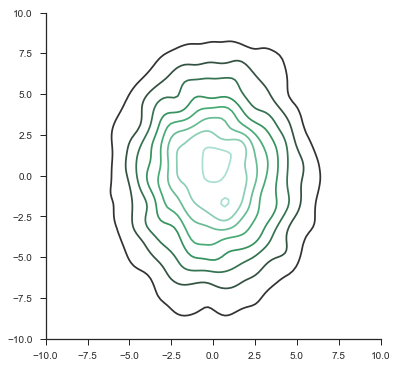

In [1]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

def get_bivariate_normal(mean, cov, size):
    return np.random.multivariate_normal(mean, cov, size)


def plot_2d_contour(mean, cov, size=10000):
    bivariate_normal = get_bivariate_normal(mean, cov, size)
    plt.figure(figsize=(6.,6.)) # keep the axes the same size for better comparison
    sns.kdeplot(bivariate_normal[:, 0], bivariate_normal[:, 1], clip=((-10,10),(-10,10)))
    sns.despine()
    

def plot_3d_contour(mean, cov, view_angle, start_mesh=-10, end_mesh=10, delta=0.1):
    x, y = np.mgrid[start_mesh:end_mesh:delta, start_mesh:end_mesh:delta]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    probability = multivariate_normal.pdf(pos, mean, cov)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, view_angle)
    ax.plot_wireframe(x, y, probability, rstride=10, cstride=10)
    
    
def rotate_2d_contour(mean, cov, angle, size=20000):
    bivariate_normal = get_bivariate_normal(mean, cov, size)
    bivariate_normal = bivariate_normal.T # row-vector data, to fit Wikipedia's format for rotation matrices
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    rotated_normal = np.dot(rotation_matrix, bivariate_normal)
    plt.figure(figsize=(6.,6.))
    sns.kdeplot(rotated_normal[0, :], rotated_normal[1, :], clip=((-10,10),(-10,10)))
    sns.despine()
    new_mean = np.mean(rotated_normal, axis=1)
    return (new_mean, np.cov(rotated_normal))


mean_1 = mean_2 = [0, 0]
cov_1 = [[9, 0], [0, 16]]
cov_2 = [[9, 6], [6, 16]]

plot_2d_contour(mean_1, cov_1)

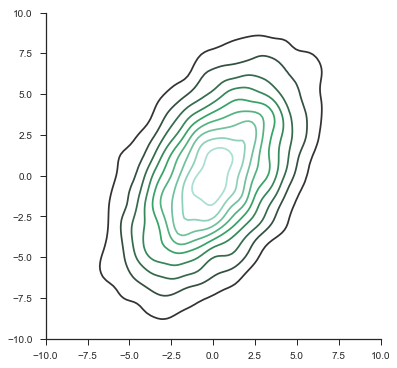

In [2]:
plot_2d_contour(mean_2, cov_2)

b)

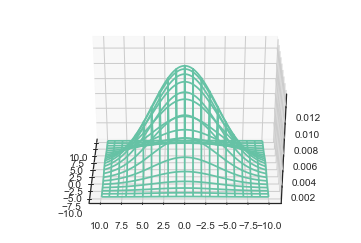

In [3]:
plot_3d_contour(mean_1, cov_1, 180)

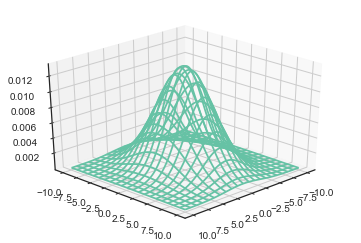

In [4]:
plot_3d_contour(mean_1, cov_1, 45)

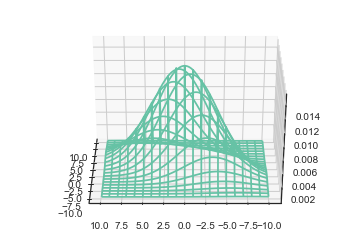

In [5]:
plot_3d_contour(mean_2, cov_2, 180)

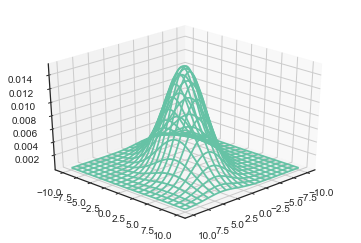

In [6]:
plot_3d_contour(mean_2, cov_2, 45)

c)

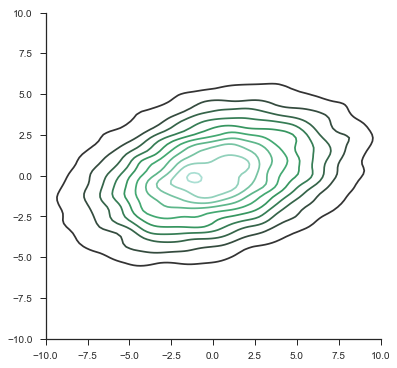

In [7]:
new_mean, new_covmatrix = rotate_2d_contour(mean_2, cov_2, angle = -np.pi/4.)

In [8]:
new_covmatrix

array([[ 18.05454761,   3.44323455],
       [  3.44323455,   6.4973046 ]])

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the Boston House Prices dataset and linear models in python.



In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()

X = boston.data
y = boston.target

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [10]:
#X = np.concatenate((X, np.square(X)), axis=1)

## Answer



(a)

In [11]:
print(X.shape)
print(X[:5])

(506, 13)
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00


(b)

In [12]:
clf = linear_model.LinearRegression()
clf.fit(X, y)

# print intercept and coefficients
print('Intercept: ', clf.intercept_)
print('Coef: ', clf.coef_)

predictions = clf.predict(X)
mse = mean_squared_error(y, predictions)
print('MSE: ', mse)

Intercept:  36.4911032804
Coef:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
MSE:  21.8977792177


(c)

In [13]:
X_train = X[:400,]
y_train = y[:400,]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

MSE train:  22.3052255842
MSE test:  38.1643386432


(d)

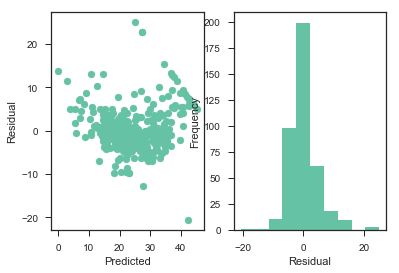

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

residuals = y_train - predictions_train
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(predictions_train, residuals)
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Residual")
ax2.hist(residuals)
ax2.set_xlabel("Residual")
ax2.set_ylabel("Frequency")

Based on the distribution, the residuals are (approximately) normally distributed, with zero mean.

(d)

In [15]:
boston = datasets.load_boston()

X = boston.data
y = boston.target
X = np.concatenate((X, np.square(X)), axis=1)

In [16]:
X_train = X[:400,]
y_train = y[:400,]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)
predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

MSE train:  14.4689173781
MSE test:  32.9465487202
